# Simple XTA Simulation Example: field1.dcm

## Simulation Setup

In [1]:
%matplotlib widget
import os, sys

sys.path.append('..')
from xta import xta_sim

#### Setting Astra Path

In [2]:
#Possible generalization for environment dependency path
os.environ['ASTRA_BIN'] = os.getenv('ASTRA_BIN')
#print(os.getenv('ASTRA_BIN'))

In [3]:
#Edit this line to match your path if the above cell doesn't work
#%env ASTRA_BIN=/Users/colinrecker/Desktop/SLACForks/Astra

#### Setting Simulation Directory Path

In [4]:
#Define xta repo path
xta_path = '/Users/colinrecker/Desktop/SLACForks/xta'
os.chdir(xta_path)

#Define simulations directory path
sim_path = '/Users/colinrecker/Google Drive/My Drive/Colin/Simulations'

#Defining tumor scan path and scrape name of file
init_dcm_path = os.path.join(sim_path, 'inputs', 'Fluence Maps Anon', 'Field 1 Anon', 'field1.dcm')

#Defining vcc laser images path
vcc_path = os.path.join(sim_path, 'inputs', 'laser_mat_images', '*.mat')

field1 = xta_sim(xta_path, sim_path, init_dcm_path, vcc_path)

### Generating Initial Electron Distribution

In [5]:
#Configuring distribution settings (distgen.yaml file)
field1.dist.input['n_particle'] = int(1e4)
fwhm = 0.06/2.355 # 60 fs = 0.06 ps
field1.dist.input['t_dist']['sigma_t']['value'] = fwhm

#Generating distribution with first index of laser images
particles, dist = field1.generate_dist(0)

## Run Simulation

### Configure Astra

In [6]:
#Adjusting astra inputs (xta.in file)
field1.astra.input['newrun']['zstart']=0.0
field1.astra.input['newrun']['zstop'] = 0.25
field1.astra.input['charge']['lspch'] = True
field1.astra.input['newrun']['zphase'] = 50
field1.astra.input['solenoid']['maxb(1)'] = 0.427

### Run Single Scan

In [7]:
#Scanning 
field1.simulation('scan', ['solenoid', 'maxb(1)'], range=[0.38, 0.45], divisions=5)
print(field1.opt_val)

#Archive simulation with desired .h5 file name
field1.archive(f'B={field1.astra.input["solenoid"]["maxb(1)"]}')

0.4325


## Plots

### Laser Image Plots

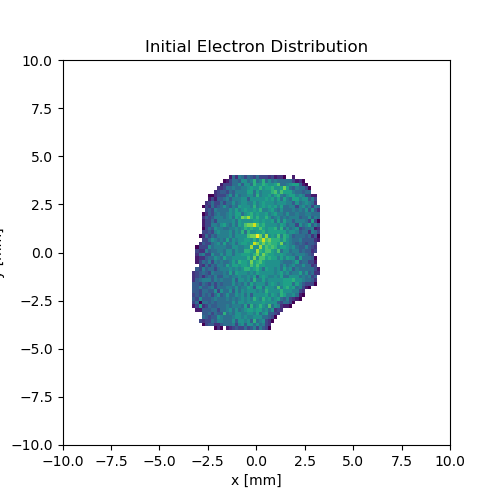

In [8]:
field1.plot('initial_dist')

### Single Electron Distribution Plots

#### Initial Electron Distribution

#### Final Electron Distribution

### Comparative Electron Distribution Plots

#### Initial vs. Final Distribution

#### Cross Sectional Distributions

#### Initial vs. Rotated Final Distribution

### Movie

### Energy Plots